### Naive Bayes Classifier

In [1]:
import numpy as np

In [2]:
# Assigning features and label variables

weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [3]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)

print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [4]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [5]:
#Combinig weather and temp into single listof tuples

features=list(zip(weather_encoded,temp_encoded))

features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [6]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


#### Naive Bayes with Multiple Labels

In [7]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [8]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [9]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [10]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [11]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [12]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [13]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [14]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


### Decision Tree Classifier

In [15]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [16]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", header=None, names=col_names)

In [17]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [18]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [19]:
numer = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'label', 'skin']

for col in numer: # coerce for missing values
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [20]:
pima.dropna(inplace=True)

In [21]:
pima.shape

(768, 9)

In [22]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [23]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

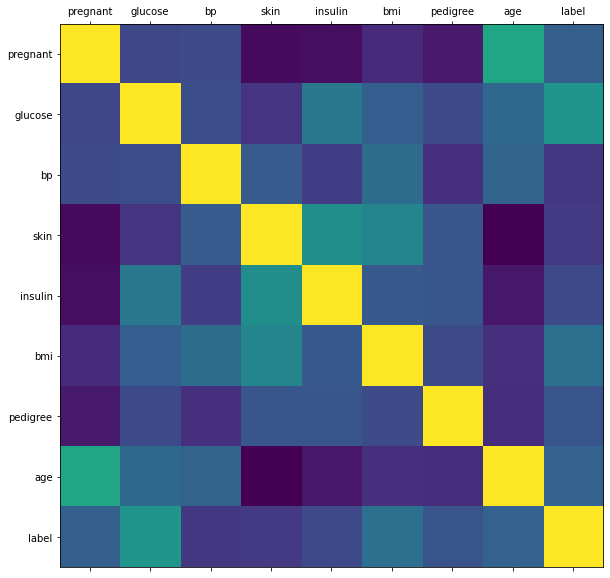

In [24]:
plot_corr(pima)

In [25]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']

X = pima[feature_cols] # Features
y = pima.label # Target variable

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


Optimizing Decision Tree Performance
- criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
- splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

Dalam Scikit-learn, pengoptimalan decision tree classifier dilakukan hanya dengan pre-pruning. Maximum depth pohon dapat digunakan sebagai variabel kontrol untuk pre-pruning. Dalam contoh berikut, kita dapat memplot decision tree pada data yang sama dengan max_depth = 3. Selain parameter pre-pruning, kita  juga dapat mencoba ukuran pemilihan atribut lain seperti entropy.

In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


### Random Forest Classifier 

Random Forest secara teknis adalah ensemble method (berdasarkan pendekatan divide-and-conquer) dari decision trees yang dihasilkan pada dataset yang dipisahkan secara acak. Kumpulan decision tree classifiers ini juga dikenal sebagai forest. Decision trees individu dihasilkan menggunakan indikator pemilihan atribut seperti information gain, gain ratio, dan Gini index untuk setiap atribut. Setiap pohon bergantung pada sampel acak yang independen. Dalam masalah klasifikasi, setiap pohon memilih dan kelas paling populer dipilih sebagai hasil akhir. Dalam kasus regresi, rata-rata dari semua keluaran pohon dianggap sebagai hasil akhir. Ini lebih sederhana dan lebih kuat dibandingkan dengan algoritma klasifikasi non-linier lainnya.

Random forest bekerja dalam 4 tahap:

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

#### Finding important features
Random forests juga menawarkan indikator feature selection yang baik. Scikit-learn menyediakan variabel tambahan dengan model tersebut, yang menunjukkan importance relatif atau kontribusi setiap fitur dalam prediksi. Secara otomatis menghitung skor relevansi setiap fitur dalam fase training . Kemudian menurunkan relevansi sehingga jumlah semua skor adalah 1.

Skor ini akan membantu kita memilih fitur yang paling penting dan menghapus fitur yang paling tidak penting untuk pembuatan model.

Random forests menggunakan gini importance atau mean decrease in impurity (MDI) untuk menghitung tingkat importance setiap fitur. Gini importance juga dikenal sebagai total decrease dalam node impurity. Ini adalah seberapa besar kecocokan atau akurasi model menurun saat kita menghapus variabel. Semakin besar penurunannya, semakin signifikan variabel tersebut. Di sini, mean decrease adalah parameter signifikan untuk pemilihan variabel. Gini index dapat menggambarkan kekuatan penjelas variabel secara keseluruhan.

#### Perbedaan Random Forest dan Decision Tree
- Random forests adalah kumpulan dari beberapa decision trees.
- Deep decision trees mungkin mengalami overfitting, tetapi random forests mencegah overfitting dengan membuat trees pada random subsets.
- Decision trees secara komputasi lebih cepat.
- Random forests sulit untuk diinterpretasikan, sedangkan decision tree mudah diinterpretasikan dan dapat diubah menjadi rules.

In [30]:
#Import scikit-learn dataset library
from sklearn import datasets 

#Load dataset
iris = datasets.load_iris()

In [31]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names) 

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
# print the iris data (top 5 records)
print(iris.data[0:5]) 

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [33]:
# Creating a DataFrame of given iris dataset.
import pandas as pd

data=pd.DataFrame({    
    'sepal length':iris.data[:,0],    
    'sepal width':iris.data[:,1],    
    'petal length':iris.data[:,2],    
    'petal width':iris.data[:,3],    
    'species':iris.target 
}) 

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [35]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
 
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

y_pred=clf.predict(X_test)

In [36]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


#### Finding Important Features in Scikit-learn

Di sini, kita dapat menemukan fitur penting atau memilih fitur dalam dataset IRIS. Dalam scikit-learn, kita dapat melakukan tugas ini dalam langkah-langkah berikut:

- First, you need to create a random forests model.
- Second, use the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.

In [37]:
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False) 

feature_imp

petal length (cm)    0.453224
petal width (cm)     0.425944
sepal length (cm)    0.109672
sepal width (cm)     0.011160
dtype: float64

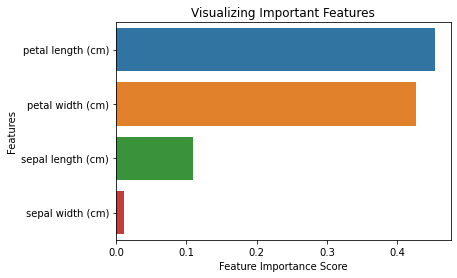

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### Generating the Model on Selected Features

In [40]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [41]:
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

# prediction on test set
y_pred=clf.predict(X_test) 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


Kita dapat melihat bahwa setelah menghapus fitur yang paling tidak penting (sepal length), keakuratannya meningkat. Ini karena kita  menghapus data dan noise yang menyesatkan, sehingga meningkatkan akurasi. Jumlah fitur yang lebih sedikit juga mengurangi training time.

### SVM Classifier

Secara umum, Support Vector Machines dianggap sebagai classification approach, tetapi dapat digunakan di kedua jenis masalah klasifikasi dan regresi. SVM dapat dengan mudah menangani beberapa variabel kontinu dan kategorikal. SVM membangun hyperplane  dalam multidimensional space untuk memisahkan kelas yang berbeda. SVM menghasilkan hyperplane optimal secara berulang, yang digunakan untuk meminimalkan kesalahan. Ide inti dari SVM adalah menemukan maximum marginal hyperplane(MMH) yang paling baik membagi dataset menjadi beberapa kelas.

In [42]:
#Import scikit-learn dataset library
from sklearn import datasets 

#Load dataset
cancer = datasets.load_breast_cancer()

In [43]:
# print the names of the 13 features
print("Features: ", cancer.feature_names) 

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [44]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [45]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [46]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [47]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [48]:
#Import svm model
from sklearn import svm 

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train) 

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [49]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [50]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred)) 

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


### Exercise: Multiple Algorithm on Dataset

In [51]:
import pandas as pd
import numpy as np

In [52]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')

In [53]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [56]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
train.fillna(train.mean(),inplace=True) 
train.isnull().sum() 

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)  
train.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

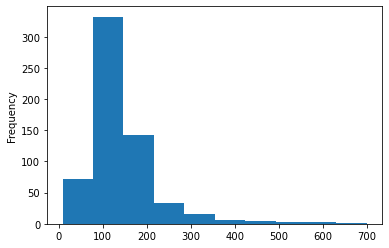

In [59]:
train['LoanAmount'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

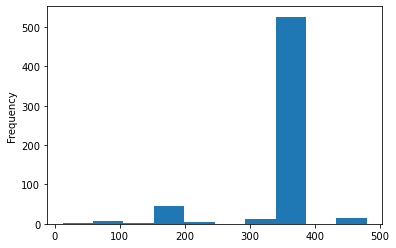

In [60]:
train['Loan_Amount_Term'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

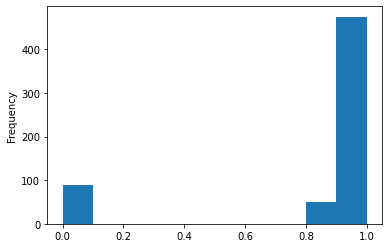

In [61]:
train['Credit_History'].plot(kind='hist')